# 보스턴 집값 데이터 회귀분석(라쏘, 릿지, 엘라스틱넷)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")

In [3]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.describe()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: >

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\finte

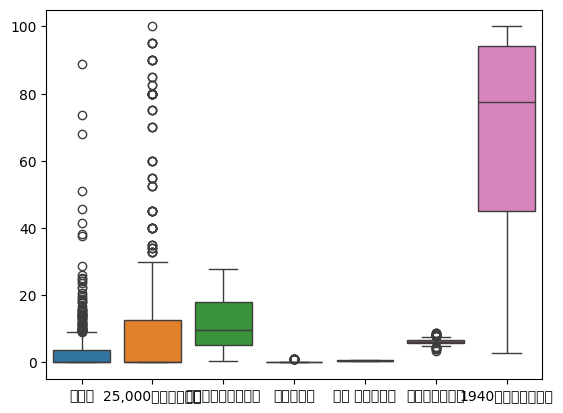

In [7]:
sns.boxplot(data[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수', '1940년이전건축비율']])

<Axes: >

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49468 (\N{HANGUL SYLLABLE SEN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51217 (\N{HANGUL SYLLABLE JEOB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\l

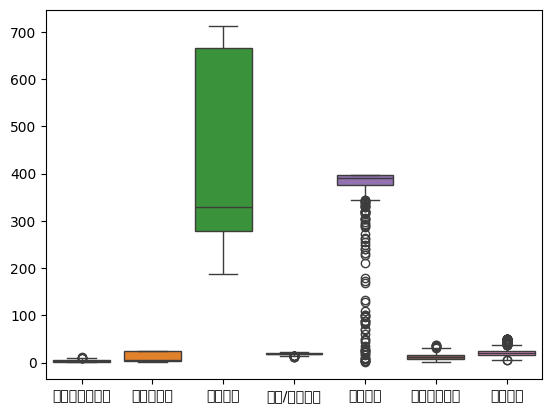

In [8]:
sns.boxplot(data[['직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격']])

In [9]:
outlier = data.describe()

In [10]:
uppwer_data = outlier.loc['75%'] + (1.5 * (outlier.loc['75%'] - outlier.loc['25%']))

In [11]:
lower_data = outlier.loc['25%'] - (1.5 * (outlier.loc['75%'] - outlier.loc['25%']))

In [12]:
Q1 = data['범죄율'].quantile(0.25)
Q3 = data['범죄율'].quantile(0.75)
IQR1 = Q3 - Q1

lower_data = Q1 - 1.5 * IQR1
uppwer_data = Q3 + 1.5 * IQR1

# 범위를 벗어나는 이상치 제거
data_cleaned = data[(data['범죄율'] >= lower_data) & (data['범죄율'] <= uppwer_data)]

In [13]:
Q1_2 = data['25,000평방피트초과'].quantile(0.25)
Q3_2 = data['25,000평방피트초과'].quantile(0.75)
IQR2 = Q3_2 - Q1_2

lower_data2 = Q1_2 - 1.5 * IQR2
uppwer_data2 = Q3_2 + 1.5 * IQR2

# 범위를 벗어나는 이상치 제거
data_cleaned = data[(data['25,000평방피트초과'] >= lower_data2) & (data['25,000평방피트초과'] <= uppwer_data2)]

In [14]:
data.groupby('주택가격')['범죄율'].value_counts()

주택가격  범죄율     
5.0   38.35180    1
      67.92080    1
5.6   25.04610    1
6.3   9.91655     1
7.0   0.18337     1
                 ..
50.0  4.89822     1
      5.66998     1
      6.53876     1
      8.26725     1
      9.23230     1
Name: count, Length: 506, dtype: int64

In [15]:
data.groupby('주택가격')['범죄율'].unique().describe()

count                    229
unique                   229
top       [38.3518, 67.9208]
freq                       1
Name: 범죄율, dtype: object

In [16]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

In [17]:
data.columns = [col.replace(' ', '').replace(',', '').replace('/','') for col in data.columns]
data.head()

,범죄율,25000평방피트초과,비소매상업지역비율,찰스강경계,농축일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
data = data.rename(columns={'25000평방피트초과': '평방피트초과_25000', '1940년이전건축비율': '이전건축비율_1940년'})

In [19]:
X = data.drop('주택가격', axis = 1)
y = data['주택가격']

In [20]:
X

,범죄율,평방피트초과_25000,비소매상업지역비율,찰스강경계,농축일산화질소,가구당평균방수,이전건축비율_1940년,직업센터접근성,도로접근성,재산세율,학생교사비율,흑인비율,하위계층비율
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [21]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 주택가격, Length: 506, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

### 다중선형회귀분석하기

In [24]:
# statsmodels R 문법
from statsmodels.formula.api import ols

In [25]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,범죄율,평방피트초과_25000,비소매상업지역비율,찰스강경계,농축일산화질소,가구당평균방수,이전건축비율_1940년,직업센터접근성,도로접근성,재산세율,학생교사비율,흑인비율,하위계층비율,주택가격
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57,20.6
460,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666.0,20.2,255.23,16.42,16.4
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188.0,19.1,389.15,14.37,22.0
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352.0,18.8,364.61,12.67,17.2
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666.0,20.2,3.50,16.94,13.5


In [26]:
data.columns

Index(['범죄율', '평방피트초과_25000', '비소매상업지역비율', '찰스강경계', '농축일산화질소', '가구당평균방수',
       '이전건축비율_1940년', '직업센터접근성', '도로접근성', '재산세율', '학생교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

In [27]:
lm = ols('주택가격 ~ 평방피트초과_25000 + 비소매상업지역비율+ 찰스강경계+ 농축일산화질소+ 가구당평균방수+ 이전건축비율_1940년+ 직업센터접근성+ 도로접근성+ 재산세율+ 학생교사비율+ 흑인비율+ 하위계층비율', data=train_data).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   주택가격   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     105.1
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          2.88e-114
Time:                        17:27:02   Log-Likelihood:                -1180.3
No. Observations:                 404   AIC:                             2387.
Df Residuals:                     391   BIC:                             2439.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.2405      5.724      4.235      0.000      12.987      35.494
평방피트초과_25000     0.0269      0.014      1.870      0.062      -0.001       0.055
비소매상업지역비율        0.0321      0.063      0.507      0.613      -0.092       0.156
찰스강경계            2.8930      0.931      3.106      0.002       1.062       4.724
농축일산화질소        -15.1080      4.156     -3.636      0.000     -23.278      -6.938
가구당평균방수          5.1783      0.467     11.077      0.000       4.259       6.097
이전건축비율_1940년    -0.0083      0.014     -0.577      0.564      -0.037       0.020
직업센터접근성         -1.2028      0.208     -5.773      0.000      -1.612      -0.793
도로접근성            0.1999      0.066      3.022      0.003       0.070       0.330
재산세율            -0.0115      0.004     -3.044      0.002      -0.019      -0.004
학생교사비율          -0.9151      0.142     -6.432      0.000      -1.195      -0.635
흑인비율             0.0101      0.003      3.330      0.001       0.004       0.016
하위계층비율          -0.4346      0.056     -7.802      0.000      -0.544      -0.325
==============================================================================
Omnibus:                      127.476   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.619
Skew:                           1.344   Prob(JB):                    2.95e-112
Kurtosis:                       7.826   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

찰스강경계 0.002 = 2.8930
농축일산화질소 0.000 = -15.1080
가구당평균방수 = 5.1783
직업센터접근성 = -1.2028
도로접근성 = 0.1999
재산세율 = -0.0115
학생교사비율 = -0.9151
흑인비율 = 0.0101
하위계층비율 = -0.4346	

Intercept = 24.2405

회귀식
y = (2.8930 * 찰스강경계) + (-15.1080 * 농축일산화질소) + (5.1783 * 가구당평균방수) + (-1.2028 * 직업센터접근성) + (0.1999 * 도로접근성) + (-0.0115 * 재산세율) + (-0.9151 * 학생교사비율) + (0.0101 * 흑인비율) + (-0.4346 * 하위계층비율) + (24.2405)

In [30]:
pred = lm.predict(X_test)

In [31]:
pred

357    22.265324
337    19.231224
327    19.856425
13     19.467021
418    12.282583
         ...    
413    11.817166
408    12.685821
80     28.575090
451    19.399582
26     15.509241
Length: 102, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
print('Mean_Squared_Error(MSE): ', mean_squared_error(y_test, pred))
print('Root_Mean_Squared_Error(RMSE): ', np.sqrt(mean_squared_error(y_test, pred)))

Mean_Squared_Error(MSE):  33.6767356869188
Root_Mean_Squared_Error(RMSE):  5.803166005459331


In [34]:
p_value = lm.pvalues[1]

C:\Users\5-04\AppData\Local\Temp\ipykernel_7796\2231671448.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = lm.pvalues[1]


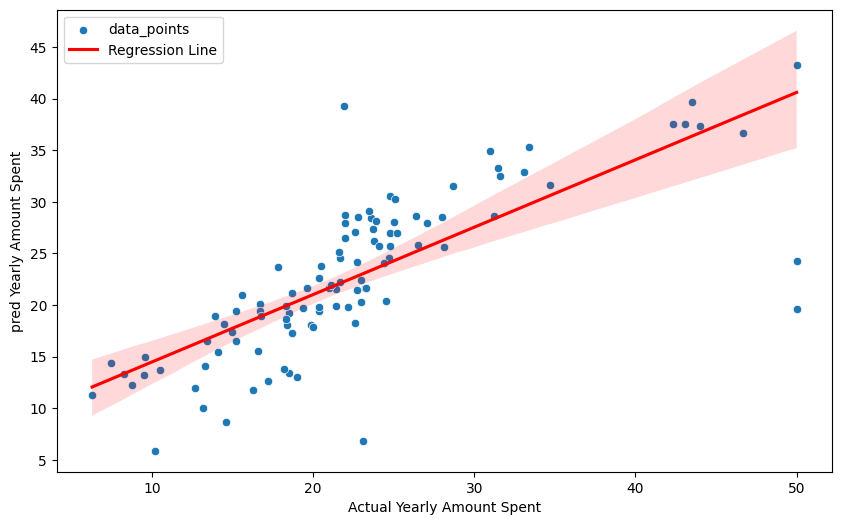

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=pred, label='data_points')
sns.regplot(x=y_test, y=pred, scatter=False, label='Regression Line', color='red')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('pred Yearly Amount Spent')
plt.legend()
plt.show()